<a href="https://colab.research.google.com/github/tvinithkumar/Collab_notebooks/blob/dev/simple_CNN_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install emnist

In [4]:
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

import emnist

print(tf.__version__)

1.14.0-rc1


In [8]:
datasets=emnist.list_datasets()
print(datasets)

['balanced', 'byclass', 'bymerge', 'digits', 'letters', 'mnist']


In [0]:
data='digits'
x_train , y_train  = emnist.extract_training_samples(data)
x_test , y_test= emnist.extract_test_samples(data)
class_names=list(set(y_train))

In [14]:
print("# of train images : {} \n size of data : {}".format(x_train.shape[0],x_train.shape[1]))
print("# of test images : {} \n size of data : {}".format(x_test.shape[0],x_test.shape[1]))

# of train images : 240000 
 size of data : 28
# of test images : 40000 
 size of data : 28


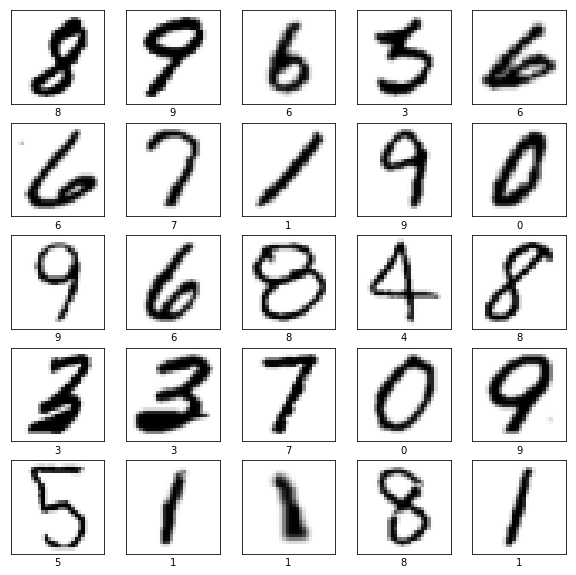

In [21]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [0]:
x_train=x_train/255.0
x_test=x_test/255.0

In [23]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

W0619 11:04:23.971664 140076106090368 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
model.fit(x_train, y_train, epochs=5)


Epoch 1/5
240000/240000 [==============================] - 21s 87us/sample - loss: 0.1172 - acc: 0.9662
Epoch 2/5
240000/240000 [==============================] - 20s 84us/sample - loss: 0.0544 - acc: 0.9837
Epoch 3/5
240000/240000 [==============================] - 22s 90us/sample - loss: 0.0426 - acc: 0.9871
Epoch 4/5
240000/240000 [==============================] - 20s 85us/sample - loss: 0.0363 - acc: 0.9892
Epoch 5/5
240000/240000 [==============================] - 20s 83us/sample - loss: 0.0320 - acc: 0.9904


In [27]:
test_loss, test_acc = model.evaluate(x_test,y_test)
print('Test accuracy:', test_acc)



40000/40000 [==============================] - 2s 39us/sample - loss: 0.0451 - acc: 0.9875
Test accuracy: 0.9875
